## Observations and Insights 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results, how="inner", on="Mouse ID")
# Display the data table for preview
mouse_study_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint_df = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_timepoint_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_all = mouse_study_df.loc[mouse_study_df.duplicated(['Mouse ID','Timepoint']),"Mouse ID"].unique()
mouse_study_df.loc[mouse_study_df["Mouse ID"]==duplicate_all[0],:]

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cl_mouse_study_df = mouse_study_df.loc[mouse_study_df['Mouse ID']!='g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
cl_mouse_study_df['Mouse ID'].nunique()



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.[\]

# set index to 
volume_stats_df = cl_mouse_study_df.groupby(["Drug Regimen"])


# # find mean
regimen_volume_mean =volume_stats_df["Tumor Volume (mm3)"].mean()
# # find median
regimen_volume_median =volume_stats_df["Tumor Volume (mm3)"].median()
#  find variance
regimen_volume_variance = volume_stats_df["Tumor Volume (mm3)"].var()

# find std deviation
regimen_volume_stdev = volume_stats_df["Tumor Volume (mm3)"].std()



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
volume_summary_dict = {"Mean":regimen_volume_mean,"Median":regimen_volume_median,
                      "Variance":regimen_volume_variance, "Standard Deviation":regimen_volume_stdev}

volume_summary_df = pd.DataFrame(volume_summary_dict)
volume_summary_df

Mean     Median   Variance  Standard Deviation
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764            4.994774
Ceftamin      52.591172  51.776157  39.290177            6.268188
Infubinol     52.884795  51.820584  43.128684            6.567243
Ketapril      55.235638  53.698743  68.553577            8.279709
Naftisol      54.331565  52.509285  66.173479            8.134708
Placebo       54.033581  52.288934  61.168083            7.821003
Propriva      52.320930  50.446266  43.852013            6.622085
Ramicane      40.216745  40.673236  23.486704            4.846308
Stelasyn      54.233149  52.431737  59.450562            7.710419
Zoniferol     53.236507  51.818479  48.533355            6.966589

In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
#Groupby & aggregate in Pandas
summary_line_df=cl_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate([np.median,np.mean,np.var,np.std])
summary_line_df

median       mean        var       std
Drug Regimen                                           
Capomulin     41.557809  40.675741  24.947764  4.994774
Ceftamin      51.776157  52.591172  39.290177  6.268188
Infubinol     51.820584  52.884795  43.128684  6.567243
Ketapril      53.698743  55.235638  68.553577  8.279709
Naftisol      52.509285  54.331565  66.173479  8.134708
Placebo       52.288934  54.033581  61.168083  7.821003
Propriva      50.446266  52.320930  43.852013  6.622085
Ramicane      40.673236  40.216745  23.486704  4.846308
Stelasyn      52.431737  54.233149  59.450562  7.710419
Zoniferol     51.818479  53.236507  48.533355  6.966589

## Bar and Pie Charts

In [10]:
# volume_stats_df['Drug Regimen'].value_counts()
# Also the same as
number_mice=volume_stats_df["Mouse ID"].count()

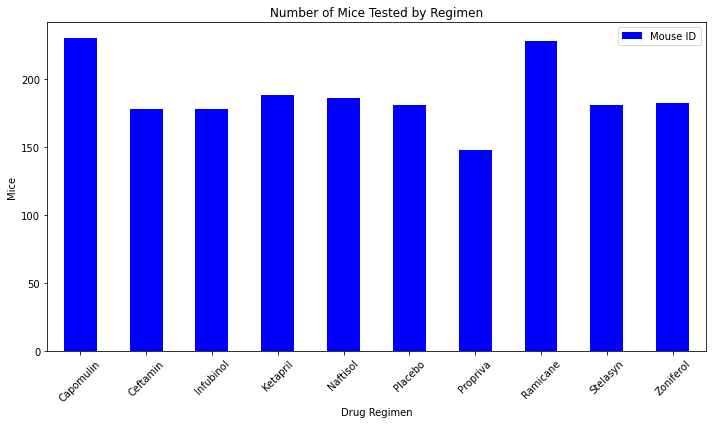

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# use groupby drug regimen and nunique to get total number of mice for each drug
uniques_by_regimen = volume_stats_df["Mouse ID"].count()
mice_tested_df = pd.DataFrame(uniques_by_regimen)

mice_tested_df.plot(kind="bar",facecolor = "blue",figsize=(10,6),alpha=1)

plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.title("Number of Mice Tested by Regimen")
plt.xticks(rotation=45)
plt.tight_layout()

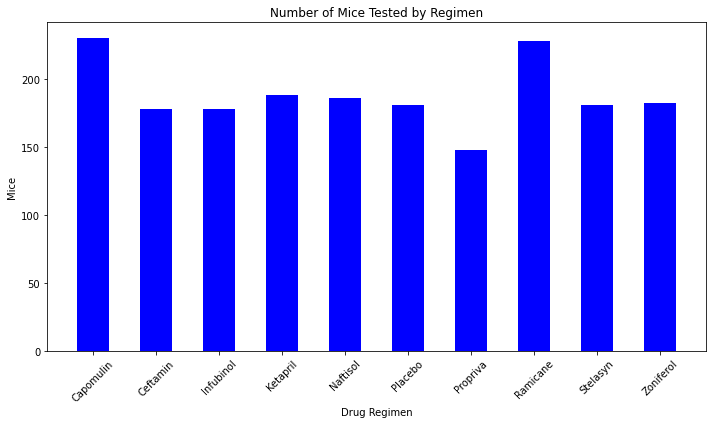

In [110]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_tested_df.index.values
y_axis = mice_tested_df["Mouse ID"] #
plt.figure(figsize=(10,6))

plt.bar(x_axis,y_axis, color="b", alpha=1, align = "center", width = .5)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.title("Number of Mice Tested by Regimen")
plt.xticks(rotation=45)
plt.tight_layout()

<AxesSubplot:title={'center':'Sex of Mice in Study'}, ylabel='Sex'>

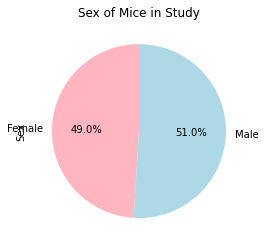

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = cl_mouse_study_df.groupby(["Sex"])
sex_count = sex_df["Sex"].count()
colors = ['lightpink','lightblue']
sex_count.plot.pie(y=sex_count,startangle=90,colors=colors,autopct="%1.1f%%",title="Sex of Mice in Study")


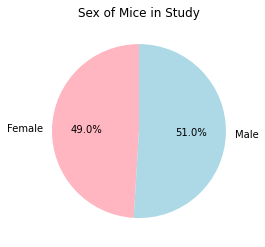

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexes=sex_count.index

plt.pie(sex_count,labels=sexes,colors=colors,autopct="%1.1f%%",startangle=90)
plt.title("Sex of Mice in Study")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
cl_mouse_study_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by finding the max timepoint for each mouse

mouse_max_timepoint = cl_mouse_study_df.groupby("Mouse ID").max()["Timepoint"]
max_timepoint_df = pd.DataFrame(mouse_max_timepoint)
max_timepoint_df = pd.merge(max_timepoint_df, cl_mouse_study_df, on =("Mouse ID", "Timepoint"))
max_timepoint_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#used list of lists to differentiate treatments


tumor_volumes= [[],[],[],[]]

# set variable to loop through index of tumor for appending to corresponding
#index of treatment_list
idx=0

# create for loop to append tumor volumes into lists of lists for each mouse
# and treatment
for treatment in treatment_list:
    for row in range(len(max_timepoint_df["Tumor Volume (mm3)"])):
        if max_timepoint_df.loc[:,"Drug Regimen"][row]==treatment:
            tumor_volumes[idx].append(max_timepoint_df.loc[:,"Tumor Volume (mm3)"][row])
    idx+=1

    
# create a dictionary for these to use in a dataframe for quartiles and outliers
tumor_vol_dict = {treatment_list[0]:tumor_volumes[0],
                 treatment_list[1]:tumor_volumes[1],
                 treatment_list[2]:tumor_volumes[2],
                 treatment_list[3]:tumor_volumes[3]}
tumor_vol_df = pd.DataFrame(tumor_vol_dict)
tumor_vol_df


Capomulin   Ramicane  Infubinol   Ceftamin
0   38.982878  38.407618  67.973419  62.999356
1   38.939633  43.047543  65.525743  45.000000
2   30.485985  38.810366  57.031862  56.057749
3   37.074024  32.978522  66.083066  55.742829
4   40.159220  38.342008  72.226731  48.722078
5   47.685963  33.397653  36.321346  47.784682
6   37.311846  37.311236  60.969711  61.849023
7   38.125164  40.659006  62.435404  68.923185
8   38.753265  29.128472  60.918767  67.748662
9   41.483008  33.562402  67.289621  57.918381
10  38.846876  36.374510  66.196912  46.784535
11  28.430964  31.560470  62.117279  59.851956
12  33.329098  36.134852  47.010364  64.299830
13  46.539206  22.050126  60.165180  59.741901
14  32.377357  30.564625  55.629428  61.433892
15  41.581521  31.095335  45.699331  64.192341
16  23.343598  45.220869  54.656549  45.000000
17  40.728578  36.561652  55.650681  52.925348
18  34.455298  37.225650  46.250112  45.000000
19  31.023923  43.419381  54.048608  67.527482
20  40.658124  30.276232  51.542431  45.000000
21  39.952347  40.667713  50.005138  64.634949
22  36.041047  43.166373  58.268442  61.386660
23  28.484033  44.183451  67.685569  68.594745
24  31.896238  30.638696  62.754451  64.729837

In [18]:
# Capomulin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_volumes = tumor_vol_df["Capomulin"]
quartiles = cap_volumes.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

 # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice who were given Capomulin and whose tumor volume was below {round(lower_bound,2)} could be outliers.")
print(f"Mice who were given Capomulin and whose tumor volume was above {round(upper_bound,2)} could be outliers.")

Mice who were given Capomulin and whose tumor volume was below 20.7 could be outliers.
Mice who were given Capomulin and whose tumor volume was above 51.83 could be outliers.


In [19]:
# Ramicane
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_volumes = tumor_vol_df["Ramicane"]
quartiles = ram_volumes.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

 # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice who were given Ramicane and whose tumor volume was below {round(lower_bound,2)} could be outliers.")
print(f"Mice who were given Ramicane and whose tumor volume was above {round(upper_bound,2)} could be outliers.")

Mice who were given Ramicane and whose tumor volume was below 17.91 could be outliers.
Mice who were given Ramicane and whose tumor volume was above 54.31 could be outliers.


In [20]:
# Infubinol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inf_volumes = tumor_vol_df["Infubinol"]
quartiles = inf_volumes.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

 # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice who were given Infubinol and whose tumor volume was below {round(lower_bound,2)} could be outliers.")
print(f"Mice who were given Infubinol and whose tumor volume was above {round(upper_bound,2)} could be outliers.")

Mice who were given Infubinol and whose tumor volume was below 36.83 could be outliers.
Mice who were given Infubinol and whose tumor volume was above 82.74 could be outliers.


In [21]:
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatment_list

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [22]:
# Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cef_volumes = tumor_vol_df["Ceftamin"]
quartiles = cef_volumes.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

 # Determine outliers using upper and lower bounds
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Mice who were given Ceftamin and whose tumor volume was below {round(lower_bound,2)} could be outliers.")
print(f"Mice who were given Ceftamin and whose tumor volume was above {round(upper_bound,2)} could be outliers.")

Mice who were given Ceftamin and whose tumor volume was below 25.36 could be outliers.
Mice who were given Ceftamin and whose tumor volume was above 87.67 could be outliers.


In [23]:
place = 2
max_timepoint_df.loc[:,"Drug Regimen"][place]
# city_weather_df.loc[ 2,"Lng" ]
# city_weather_df.loc[ : ,"Lng" ]
# city_weather_df.loc[1:2, 'Lng':'Max Temp']
# city_weather_df.loc[city_weather_df["Humidity"]<50 ,:]
# city_weather_df.loc[city_weather_df["Humidity"]>100,:]

'Placebo'

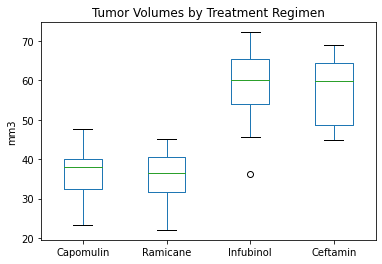

In [106]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# mouse_study_df['Age_months'].plot(kind = 'boxplot')

tumor_vol_df.plot.box()
plt.ylabel('mm3')
plt.title('Tumor Volumes by Treatment Regimen')
plt.show()

## Line and Scatter Plots

In [78]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cl_mouse_study_df.loc[cl_mouse_study_df["Drug Regimen"] == "Capomulin", :]
capomulin_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496                 0  
12             37.614948                 0  
13             38.177232                 0  
14             36.866876                 0  
...                  ...               ...  
440            47.685963                 1  
1452           45.000000                 0  
1453           45.597064                 0  
1454           46.059608                 0  
1455           46.539206                 0  

[230 rows x 8 columns]

In [34]:
# Find the mouse with the most instances as top = w914
capomulin_df["Mouse ID"].describe()

count      230
unique      25
top       w914
freq        10
Name: Mouse ID, dtype: object

In [37]:
# locate the data for mouse id w914
w914_data = capomulin_df.loc[capomulin_df['Mouse ID'] == 'w914']
w914_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
215     w914    Capomulin  Male          24          21          0   
216     w914    Capomulin  Male          24          21          5   
217     w914    Capomulin  Male          24          21         10   
218     w914    Capomulin  Male          24          21         15   
219     w914    Capomulin  Male          24          21         20   
220     w914    Capomulin  Male          24          21         25   
221     w914    Capomulin  Male          24          21         30   
222     w914    Capomulin  Male          24          21         35   
223     w914    Capomulin  Male          24          21         40   
224     w914    Capomulin  Male          24          21         45   

     Tumor Volume (mm3)  Metastatic Sites  
215           45.000000                 0  
216           45.893720                 0  
217           43.231963                 0  
218           43.688449                 0  
219           41.108092                 0  
220           40.291917                 0  
221           40.993110                 0  
222           41.664916                 1  
223           35.611309                 2  
224           36.041047                 2

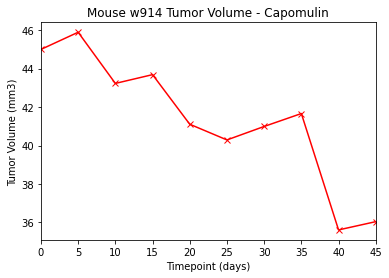

In [55]:
# define timepoint and tumor volume as variable

timepoint = w914_data['Timepoint']
tumor_volume = w914_data['Tumor Volume (mm3)']

# create line graph


plt.plot(timepoint,tumor_volume, color='r', marker = 'x')

plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Mouse w914 Tumor Volume - Capomulin')
plt.xlim([0,45])
plt.show()

In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_vol_group = capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
average_vol_df = pd.DataFrame(mouse_vol_group)

# create list of volumes
volumes = average_vol_df['Tumor Volume (mm3)']
# group by mouse weight

# all weights the same so chose to show by max weight
mouse_weights = capomulin_df.groupby('Mouse ID').max()['Weight (g)'] 
mouse_weights_df = pd.DataFrame(mouse_weights)

weights=mouse_weights_df['Weight (g)']



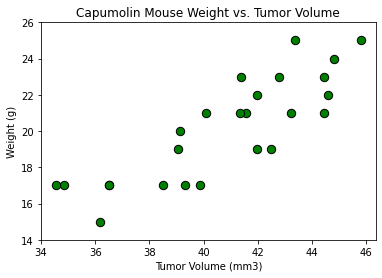

In [96]:
# Generate Scatter plot

plt.scatter(volumes,weights, marker = 'o', facecolors = 'green', edgecolors = 'black', s=70)
plt.ylim(14,26)
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.title('Capumolin Mouse Weight vs. Tumor Volume')
plt.show()

## Correlation and Regression

In [27]:
# Y = slope*x + intercept
# r squarw - tlls you how much the regression line is explaining thsoe data points
# pvalue - tells you if the model you've built is worth building or not. (<.05) - I am 95% confident that this model is worht it

In [28]:
# Intercept , slope , r square , stderror , pvalue

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weights,volumes)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


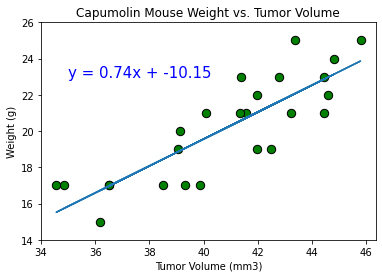

In [108]:
# Find the regression of the weight vs. volume
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(volumes, weights)
m_fit = m_slope * volumes + m_int

line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))

plt.scatter(volumes,weights, marker = 'o', facecolors = 'green', edgecolors = 'black', s=70)
plt.ylim(14,26)
plt.plot(volumes,m_fit)
plt.annotate(line_eq,(35,23),fontsize=15,color='blue')
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.title('Capumolin Mouse Weight vs. Tumor Volume')
plt.show()
